In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [2]:
!pip install torchSummary
!pip install albumentations

In [3]:
class MobileNet(nn.Module) :
    def __init__(self, in_channels = 3, outputs = 6):
        super().__init__()

        self.part1 = nn.Sequential(
            nn.Conv2d( in_channels = 3, out_channels =32, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(nn.BatchNorm2d(32)),

            nn.Conv2d( in_channels = 32, out_channels =32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(32)),

            nn.Conv2d( in_channels = 32, out_channels =64, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(64)),

            nn.Conv2d( in_channels = 64, out_channels =64, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(nn.BatchNorm2d(64)),

            nn.Conv2d( in_channels = 64, out_channels =128, kernel_size=1, stride=1, padding=0),
            nn.ReLU(nn.BatchNorm2d(128)),

            nn.Conv2d( in_channels = 128, out_channels =128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(128)),

            nn.Conv2d( in_channels = 128, out_channels =128, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(128)),

            nn.Conv2d( in_channels = 128, out_channels =128, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(nn.BatchNorm2d(128)),

            nn.Conv2d( in_channels = 128, out_channels =256, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(256)),

            nn.Conv2d( in_channels = 256, out_channels =256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(256)),

            nn.Conv2d( in_channels = 256, out_channels =256, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(256)),

            nn.Conv2d( in_channels = 256, out_channels =256, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(nn.BatchNorm2d(256)),


            nn.Conv2d( in_channels = 256, out_channels =512, kernel_size=1, stride=1, padding=0),
            nn.ELU(),
            nn.BatchNorm2d(512)
        )



            #----------------------------------------------------------------------------------------------

        self.part2 = nn.Sequential(
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(512)),

            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(512)),

            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=1, stride=1, padding=0),
            nn.ReLU(nn.BatchNorm2d(512)),

            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(512)),

            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),

            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=1, stride=1, padding=0),
            nn.ELU(),
            nn.BatchNorm2d(512)

        )
            #-------------------------------------------------------------------------------------------------------------

        self.part3 = nn.Sequential(
            nn.Conv2d( in_channels = 512, out_channels =512, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(nn.BatchNorm2d(512)),
            nn.Conv2d( in_channels = 512, out_channels =1024, kernel_size=1, stride=1, padding=0),
#             nn.ReLU(nn.BatchNorm2d(1024)),

            nn.Conv2d( in_channels = 1024, out_channels =1024, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(nn.BatchNorm2d(1024)),

            nn.Conv2d( in_channels = 1024, out_channels =1024, kernel_size=1, stride=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(1024)
        )
        self.avgpool = nn.AvgPool2d(7)
        self.fc = nn.Linear(1024,6)

    def forward(self, input):
        input = self.part1(input)
#         print("part1 output ",input.shape)

        input = self.part2(input)
#         print(input.shape)

        input = self.part3(input)
#         print(input.shape)

        input = self.avgpool(input)
#         print(input.shape)


        input = torch.flatten(input,1)


        input  = self.fc(input)
#         print(input.shape)
#         input = nn.Softmax(dim=1)

        return input

In [4]:
from torchsummary import summary
model = MobileNet(3, outputs = 6)
model.to(device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
            Conv2d-2         [-1, 32, 112, 112]           9,248
            Conv2d-3         [-1, 64, 112, 112]           2,112
            Conv2d-4           [-1, 64, 56, 56]          36,928
            Conv2d-5          [-1, 128, 56, 56]           8,320
              ReLU-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]         147,584
            Conv2d-8          [-1, 128, 56, 56]          16,512
            Conv2d-9          [-1, 128, 28, 28]         147,584
           Conv2d-10          [-1, 256, 28, 28]          33,024
           Conv2d-11          [-1, 256, 28, 28]         590,080
           Conv2d-12          [-1, 256, 28, 28]          65,792
           Conv2d-13          [-1, 256, 14, 14]         590,080
           Conv2d-14          [-1, 512,

In [5]:
import os
import glob
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import torchvision
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import albumentations as A

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Garbage classification

/content/drive/MyDrive/Garbage classification


In [8]:
path = "/content/drive/MyDrive/Garbage classification"
os.listdir(path)
glob.glob(path+"/*")

['/content/drive/MyDrive/Garbage classification/cardboard',
 '/content/drive/MyDrive/Garbage classification/trash',
 '/content/drive/MyDrive/Garbage classification/metal',
 '/content/drive/MyDrive/Garbage classification/glass',
 '/content/drive/MyDrive/Garbage classification/paper',
 '/content/drive/MyDrive/Garbage classification/plastic']

In [9]:
folders = glob.glob(path+"/*")
count = 0

for i in folders:
    count=0
    count+=len(os.listdir(i))
    print(i,' =  ', count)

/content/drive/MyDrive/Garbage classification/cardboard  =   403
/content/drive/MyDrive/Garbage classification/trash  =   137
/content/drive/MyDrive/Garbage classification/metal  =   410
/content/drive/MyDrive/Garbage classification/glass  =   501
/content/drive/MyDrive/Garbage classification/paper  =   594
/content/drive/MyDrive/Garbage classification/plastic  =   492


In [10]:
transform2  = A.Compose([
    A.HorizontalFlip(p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.2),
    A.VerticalFlip(p=0.2),
    A.Rotate(0,80),
    A.Resize(224,224),
    A.Normalize(max_pixel_value = 255.0,p=1)
])

In [11]:
import cv2
import imageio as iio
import PIL as image

class CustomDataset(Dataset):
    def __init__(self, transform = None):
        self.folder = path
        folders = glob.glob(self.folder + "/*")
#         print('folders',folders)

        self.transform = transform
        self.data = []
        for class_path in folders:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpg"):
                self.data.append([img_path, class_name])

#         print(self.data[0])


        self.class_map = {
            'metal' : 0,
            'glass' : 1,
            'plastic' : 2,
            'paper':3,
            'cardboard':4,
            'trash' :5

        }
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224,224))

        # Augmentations
        if self.transform is not None:
            transformed = transform2(image = img)
            transformed_image = transformed['image']
            img = cv2.resize(img,(224,224))


        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        img_tensor = img_tensor.to(torch.float32)

        class_id = class_id
        return img_tensor, class_id

In [12]:
dataset = CustomDataset(transform = transform2)
len(dataset) # 2527 images

2537

In [13]:
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [2237, 300])

In [14]:
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle=False, num_workers=2)

In [15]:
for i, (j,k) in enumerate(val_dataloader):
    print(k)

tensor([3, 1, 2, 3, 4, 0, 2, 1, 4, 3, 2, 2, 2, 5, 4, 0, 1, 1, 0, 5, 2, 3, 5, 4,
        3, 1, 1, 4, 1, 3, 1, 1, 4, 4, 2, 4, 2, 3, 1, 3, 4, 2, 4, 0, 2, 2, 2, 4,
        1, 1, 1, 0, 2, 5, 2, 1, 0, 3, 3, 0, 5, 1, 2, 1])
tensor([1, 1, 1, 1, 3, 5, 3, 2, 3, 0, 0, 3, 0, 1, 4, 1, 2, 0, 4, 4, 0, 2, 4, 4,
        1, 0, 4, 0, 5, 2, 1, 1, 3, 2, 0, 2, 1, 3, 0, 3, 2, 1, 5, 2, 0, 3, 4, 0,
        0, 1, 2, 4, 0, 4, 2, 4, 1, 2, 2, 2, 2, 3, 1, 0])
tensor([3, 0, 3, 1, 0, 3, 0, 2, 1, 5, 1, 4, 2, 2, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
        5, 1, 0, 3, 4, 4, 4, 1, 3, 3, 0, 3, 3, 0, 4, 4, 0, 1, 0, 4, 2, 2, 3, 3,
        3, 0, 0, 2, 3, 0, 4, 3, 0, 3, 4, 1, 0, 0, 1, 0])
tensor([2, 2, 0, 1, 2, 3, 4, 5, 1, 1, 4, 2, 3, 0, 4, 3, 1, 3, 1, 1, 1, 3, 1, 2,
        3, 1, 4, 1, 1, 2, 1, 5, 0, 1, 2, 4, 4, 1, 3, 4, 1, 2, 3, 3, 3, 3, 3, 0,
        3, 1, 4, 3, 5, 3, 0, 3, 1, 1, 2, 1, 3, 0, 1, 1])
tensor([5, 5, 4, 1, 0, 2, 1, 2, 0, 2, 1, 2, 3, 1, 0, 1, 4, 2, 2, 4, 2, 3, 0, 3,
        0, 3, 3, 3, 3, 1, 0, 2, 3, 4, 3, 1, 1, 0, 1,

In [16]:
mobile_net = MobileNet(3,6)
mobile_net.to(device)

MobileNet(
  (part1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU(
      inplace=True
      (inplace): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobile_net.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=5, verbose=True)

In [22]:
import time
def evaluate_model(model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    y_pred = []
    y_true = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()



            output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
            y_pred.extend(output) # Save Prediction

            labels = targets.data.cpu().numpy()
            y_true.extend(labels) # Save Truth


    print('Accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))
    return y_pred, y_true

In [23]:
t0 = time.time()
mobile_net_num_epochs = 50
mobile_net_val_losses = []
mobile_net_train_losses = []

mobile_net.train()
for epoch in range(mobile_net_num_epochs):
    train_loss= 0.0
    for i, (inputs,targets) in enumerate(train_dataloader):

        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = mobile_net(inputs)

        optimizer.zero_grad()

        train_loss = criterion(outputs, targets)
        # print(train_loss.item())

            # backward pass

        train_loss.backward()

            # update parameters
        optimizer.step()
    mobile_net_train_losses.append(train_loss.item())

    mobile_net.eval()

    val_loss = 0.0
    for i, (inputs, targets) in enumerate(val_dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)

            # forward pass
        outputs = mobile_net(inputs)

        val_loss = criterion(outputs, targets)

    mobile_net_val_losses.append(val_loss.item())


    scheduler.step(val_loss)

    print('training Loss at epoch ', epoch+1 , "=" ,train_loss.item())
    print('validation Loss at epoch ', epoch+1 , "=" ,val_loss.item())
    evaluate_model(mobile_net, val_dataloader, device)

t1 = time.time()
print("Total time taken " ,(t1-t0)/60 )

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c2449b936d0>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7c2449b936d0>    
self._shutdown_workers()Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__

    self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers

    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 1

training Loss at epoch  1 = 1.3782764673233032
validation Loss at epoch  1 = 2.4230358600616455
Accuracy: 20.33
training Loss at epoch  2 = 1.5940454006195068
validation Loss at epoch  2 = 1.6428894996643066
Accuracy: 24.67
training Loss at epoch  3 = 1.501265048980713
validation Loss at epoch  3 = 1.4929035902023315
Accuracy: 32.67
training Loss at epoch  4 = 1.4491270780563354
validation Loss at epoch  4 = 1.304293155670166
Accuracy: 42.00
training Loss at epoch  5 = 1.5525693893432617
validation Loss at epoch  5 = 1.467589259147644
Accuracy: 31.00
training Loss at epoch  6 = 1.5366867780685425
validation Loss at epoch  6 = 1.2331563234329224
Accuracy: 45.33
training Loss at epoch  7 = 1.3383996486663818
validation Loss at epoch  7 = 1.2760928869247437
Accuracy: 41.67
training Loss at epoch  8 = 1.410335898399353
validation Loss at epoch  8 = 1.4051663875579834
Accuracy: 38.33
training Loss at epoch  9 = 1.2757620811462402
validation Loss at epoch  9 = 1.3634499311447144
Accuracy: 44

In [24]:
def plot_train_curve(train_losses):
    plt.figure(figsize=(10, 4))
    plt.plot(train_losses)
    plt.xlabel('Iteration')
    plt.ylabel('Training loss')
    plt.title('NLL Loss')
    plt.show()

In [25]:
def plot_val_curve(val_losses):
    plt.figure(figsize = (10,4))
    plt.plot(val_losses)
    plt.xlabel('Iteration')
    plt.ylabel('Validation loss')
    plt.title('NLL Loss')
    plt.show()

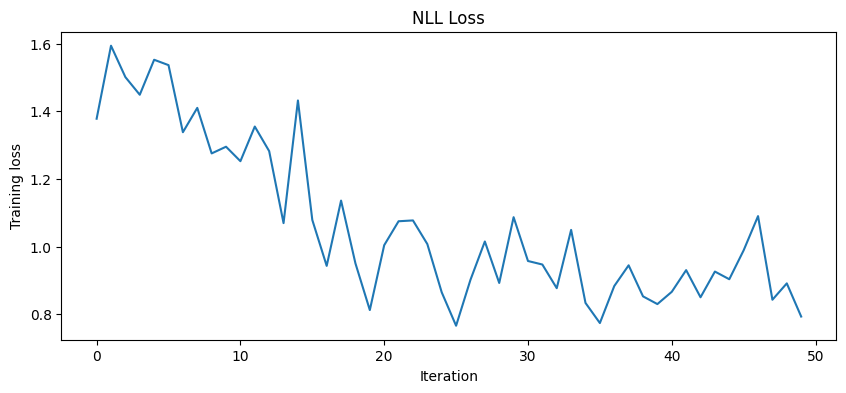

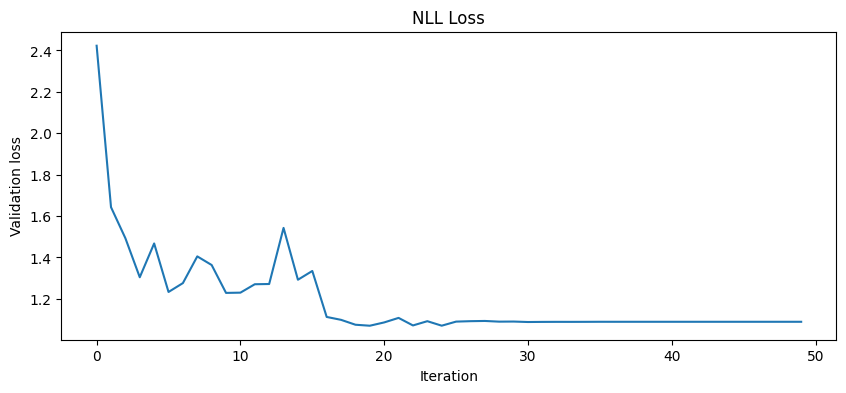

In [26]:
plot_train_curve(mobile_net_train_losses)
plot_val_curve(mobile_net_val_losses)

In [27]:
classes = {
            'metal' : 0,
            'glass' : 1,
            'plastic' : 2,
            'paper':3,
            'cardboard':4,
            'trash' :5
          }

In [28]:
train_y_pred, train_y_true = evaluate_model(mobile_net, train_dataloader, device)

Accuracy: 65.22


In [29]:
y_pred, y_true = evaluate_model(mobile_net, val_dataloader, device)

Accuracy: 60.00


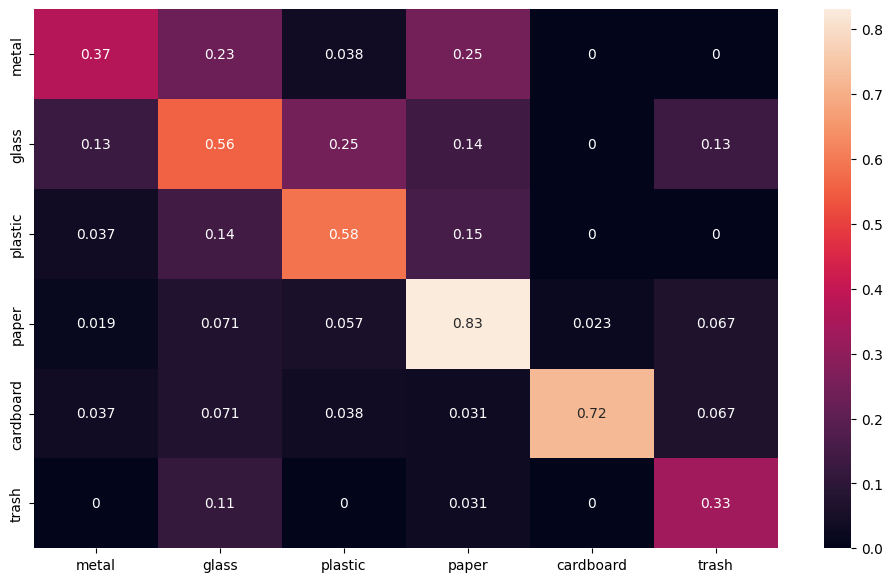

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')